# HW6

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
#%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

## Cleaning

We will start by cleaning the data set. This part is already done it for you. So, you should just execute the code below.

In [21]:
df = pd.read_csv("titanic.csv")

Get rid of useless attributes

In [22]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Binarize gender

In [23]:
df['Male'] = df.Sex == 'male'

In [24]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for port of origin

In [25]:
df = pd.get_dummies(data=df,columns=['Embarked'])

Remove the nulls

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Male        891 non-null    bool   
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(3)
memory usage: 45.4 KB


In [27]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [28]:
df.Age.isna().sum()

177

In [29]:
len(df)

891

In [30]:
df.dropna(inplace=True)

In [31]:
len(df)

714

In [32]:
len(df) + 177 == 891

True

In [33]:
.

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,0
2,1,3,26.0,0,0,7.9250,False,0,0,1
3,1,1,35.0,1,0,53.1000,False,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,0,1


## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 1

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. (In Camino, pick the answer with the right description)

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [43]:
np.random.seed(0)
n_samples = 100

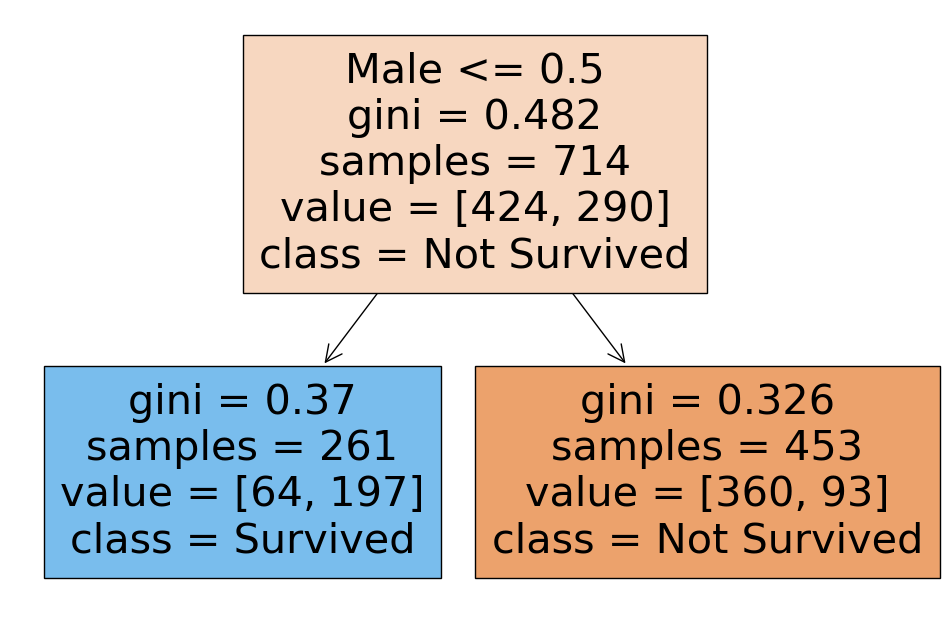

In [50]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Build the decision tree model with a maximum depth of 1
decision_tree_model = DecisionTreeClassifier(max_depth=1)
decision_tree_model.fit(X, y)

feature_names_list = X.columns.tolist()

# Plot the decision tree 
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=feature_names_list, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

### Question 2

In **at most 10 words**, explain what the decision tree tells us. Write your answer in a markdown cell. (In Camino, fill the same sentence into the blank)

Gender significantly impacts Titanic survival prediction

### Question 3

Use **one** seaborn command to draw a bar chart to **statistically** validate what you found in the previous question. (In Camino, fill in the program code line you used) 

<Axes: xlabel='Male', ylabel='Survived'>

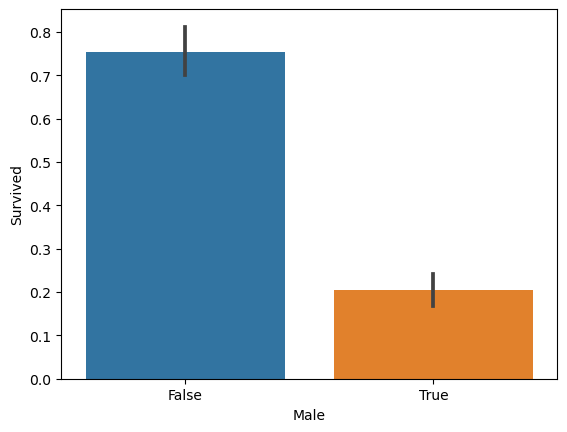

In [51]:
sns.barplot(x='Male', y='Survived', data=df)

### Question 4

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves. (In Camino, pick the 3 attributes/predictors decision tree used to build the tree.)

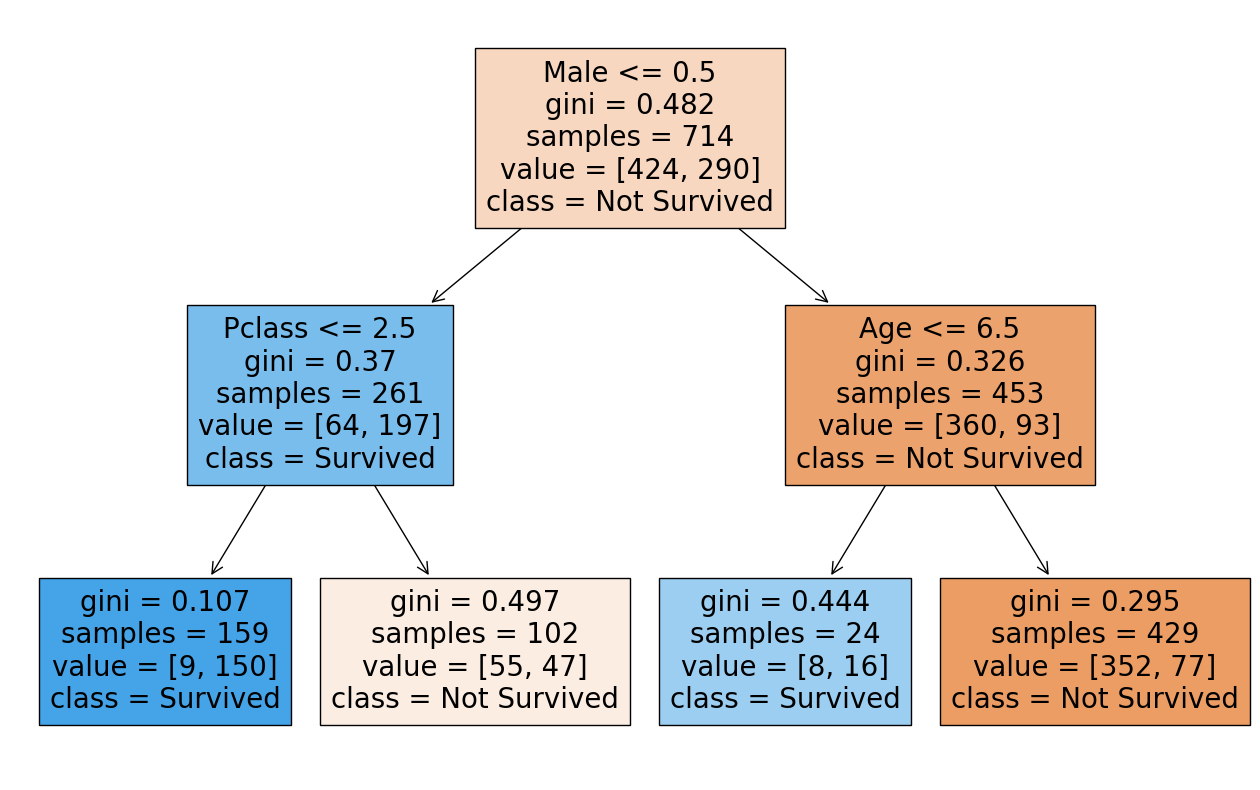

In [58]:
# Build the decision tree model with a maximum depth of 2
decision_tree_model_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree_model_depth2.fit(X, y)
feature_names_list = X.columns.tolist()

plt.figure(figsize=(16, 10))
plot_tree(decision_tree_model_depth2, feature_names=feature_names_list, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

### Question 5

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the first two Jupyter cells following this cell</b> (<b>the following cells will be ignored, without exception</b>). The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. 

### Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

Female passengers in 1st and 2nd class had significantly higher survival rates compared to males and those in 3rd class.

Code cell:

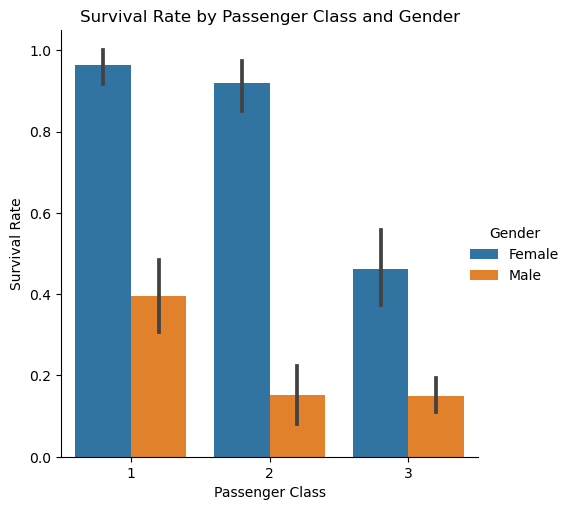

In [62]:
chart = sns.catplot(x="Pclass", y="Survived", hue="Male", kind="bar", data=df)
chart.set_axis_labels("Passenger Class", "Survival Rate")
chart._legend.set_title('Gender')
new_labels = ['Female', 'Male']
for t, l in zip(chart._legend.texts, new_labels): t.set_text(l)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

### Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

Most of the children aged 6.5 or below survived, regardless of gender.

Code cell:

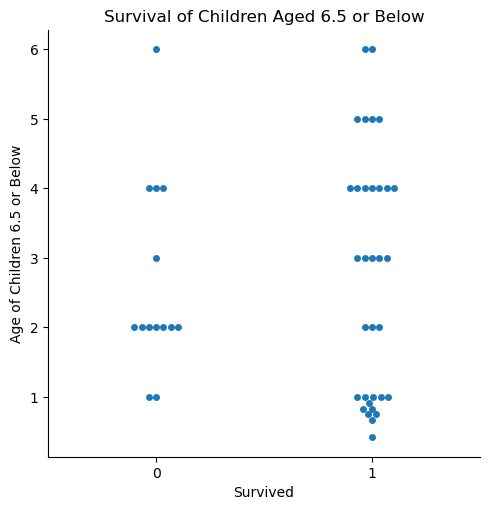

In [64]:
chart = sns.catplot(x="Survived", y="Age", kind="swarm", data=df[df['Age'] <= 6.5])
chart.set_axis_labels("Survived", "Age of Children 6.5 or Below")
plt.title('Survival of Children Aged 6.5 or Below')
plt.show()